<a href="https://colab.research.google.com/github/ssk5454/Sparks/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP: THE SPARKS FOUNDATION

**DATA SCIENCE & BUSINESS ANALYTICS**

**TASK-1: PREDICTION USING SUPERVISED ML**

NAME: SHIVA SAI KRISHNA

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data from the given url

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Student Data")
student_data

Student Data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# shape is a tuple of dimensions of the array

student_data.shape

(25, 2)

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# describe - view basic statistical data

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


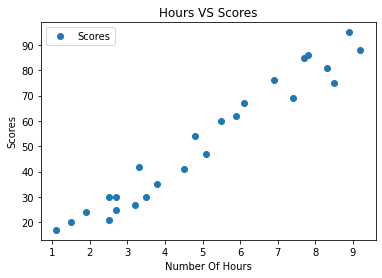

In [6]:
#Visualizing and Analizing the dataset:
#plotting the graph - percentage scores vs no. of hours studied

student_data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours VS Scores")
plt.xlabel("Number Of Hours")
plt.ylabel("Scores")
plt.show()

In [7]:
#Preparing the data - separating the data into X (no. of hours) and Y (score)

x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values

In [8]:
#split data as into train/test datasets using Scikit-learn;s built-in function

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
#design & train the model 

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print("Completed")

Completed


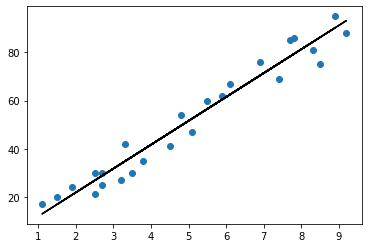

In [11]:
#Plotting regression line

line=regressor.coef_*x+regressor.intercept_ 
plt.scatter(x,y)
plt.plot(x,line,color="black")
plt.show()

In [12]:
#predictions using testing data

print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
#Comparing Actual and Predicted values

df = pd.DataFrame({'Actual': y_test,'Predicted':y_pred })
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#evaluation of the model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Max Error: 6.732260779489835
Mean Squared Error: 21.598769307217456


In [15]:
#predicting score if a student studies for 9.25 hrs/ day

hrs=9.25
pred_score = regressor.predict([[hrs]])
print(f"Predicted score if student studies for 9.25 hrs a day is: {pred_score[0]}")

Predicted score if student studies for 9.25 hrs a day is: 93.69173248737539
